In [39]:
import zipfile

path = '/content/archive.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

In [40]:
import pandas as pd

DATA_PATH = '../../clothes_dataset'
train_df = pd.read_csv('/content/train.csv')
val_df = pd.read_csv('/content/val.csv')
test_df = pd.read_csv('/content/test.csv')

print(train_df.head())

   Unnamed: 0                                              image  black  blue  \
0           0  ./clothes_dataset\blue_shorts\256d854b55ac32ea...    0.0   1.0   
1           1  ./clothes_dataset\red_pants\584f778aece14f07c2...    0.0   0.0   
2           2  ./clothes_dataset\green_pants\ec543ca241cefb2b...    0.0   0.0   
3           3  ./clothes_dataset\brown_shorts\c8db9e0f7010592...    0.0   0.0   
4           4  ./clothes_dataset\white_dress\551373c80717c5b0...    0.0   0.0   

   brown  green  red  white  dress  shirt  pants  shorts  shoes  
0    0.0    0.0  0.0    0.0    0.0    0.0    0.0     1.0    0.0  
1    0.0    0.0  1.0    0.0    0.0    0.0    1.0     0.0    0.0  
2    0.0    1.0  0.0    0.0    0.0    0.0    1.0     0.0    0.0  
3    1.0    0.0  0.0    0.0    0.0    0.0    0.0     1.0    0.0  
4    0.0    0.0  0.0    1.0    1.0    0.0    0.0     0.0    0.0  


In [41]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1. / 255)
val_datagen = ImageDataGenerator(rescale=1. / 255)

def get_steps(num_samples, batch_size):
    if (num_samples % batch_size) > 0:
        return (num_samples // batch_size) + 1
    else:
        return num_samples // batch_size

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential()
# 입력 데이터의 형태를 꼭 명시해야 합니다.
model.add(Flatten(input_shape = (112, 112, 3))) # (112, 112, 3) -> (112 * 112 * 3)
model.add(Dense(128, activation = 'relu')) # 128개의 출력을 가지는 Dense 층
model.add(Dense(64, activation = 'relu')) # 64개의 출력을 가지는 Dense 층
model.add(Dense(11, activation = 'sigmoid')) # 11개의 출력을 가지는 신경망

model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['acc'])

In [43]:
batch_size = 8
train_df['image'] = train_df['image'].apply(lambda x: x.replace('\\', '/'))
train_df.head()

,Unnamed: 0,image,black,blue,brown,green,red,white,dress,shirt,pants,shorts,shoes
0,0,./clothes_dataset/blue_shorts/256d854b55ac32ea...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,./clothes_dataset/red_pants/584f778aece14f07c2...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2,./clothes_dataset/green_pants/ec543ca241cefb2b...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3,./clothes_dataset/brown_shorts/c8db9e0f7010592...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4,./clothes_dataset/white_dress/551373c80717c5b0...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [44]:
val_df['image'] = val_df['image'].apply(lambda x: x.replace('\\', '/'))
val_df.head()

,Unnamed: 0,image,black,blue,brown,green,red,white,dress,shirt,pants,shorts,shoes
0,0,./clothes_dataset/black_shirt/caf19003d77246a8...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,./clothes_dataset/blue_pants/7e42face2c655f1bf...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2,./clothes_dataset/red_dress/d46069bf0d2c1cc6bb...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,3,./clothes_dataset/blue_dress/fea68beee2e52c48d...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,4,./clothes_dataset/white_shoes/b378e85b811cfef4...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [45]:
# Make Generator
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory='./',
    x_col = 'image',
    y_col = list(train_df.columns[2:]),
    target_size = (112, 112),
    color_mode='rgb',
    class_mode='other',
    batch_size=batch_size,
    seed=42
)

val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    directory='./',
    x_col = 'image',
    y_col = list(val_df.columns[2:]),
    target_size = (112, 112),
    color_mode='rgb',
    class_mode='other',
    batch_size=batch_size,
    shuffle=True
)

Found 5578 validated image filenames.
Found 2391 validated image filenames.


In [46]:
model.fit(train_generator,
         steps_per_epoch=get_steps(len(train_df), batch_size),
         validation_data = val_generator,
         validation_steps=get_steps(len(val_df), batch_size),
         epochs = 10)

Epoch 1/10
698/698 [==============================] - 55s 78ms/step - loss: 0.4271 - acc: 0.3607 - val_loss: 0.2750 - val_acc: 0.4927
Epoch 2/10
698/698 [==============================] - 58s 82ms/step - loss: 0.2572 - acc: 0.4839 - val_loss: 0.2954 - val_acc: 0.4714
Epoch 3/10
698/698 [==============================] - 59s 84ms/step - loss: 0.2273 - acc: 0.5281 - val_loss: 0.2274 - val_acc: 0.5671
Epoch 4/10
698/698 [==============================] - 60s 86ms/step - loss: 0.2230 - acc: 0.5558 - val_loss: 0.2402 - val_acc: 0.6018
Epoch 5/10
698/698 [==============================] - 58s 84ms/step - loss: 0.2022 - acc: 0.5683 - val_loss: 0.2303 - val_acc: 0.5805
Epoch 6/10
698/698 [==============================] - 54s 78ms/step - loss: 0.2009 - acc: 0.5850 - val_loss: 0.2679 - val_acc: 0.5621
Epoch 7/10
698/698 [==============================] - 59s 84ms/step - loss: 0.1845 - acc: 0.6000 - val_loss: 0.2622 - val_acc: 0.5416
Epoch 8/10
698/698 [==============================] - 57s 82ms

In [47]:
test_df['image'] = test_df['image'].apply(lambda x: x.replace('\\', '/'))
test_df.head()

,Unnamed: 0,image,black,blue,brown,green,red,white,dress,shirt,pants,shorts,shoes
0,0,./clothes_dataset/blue_shorts/1ec871cdfe41ff20...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,./clothes_dataset/black_pants/0f8eb4509cea01f9...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2,./clothes_dataset/white_shoes/1d70ebaec12e09f3...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,3,./clothes_dataset/green_shoes/a4e155f7249a591e...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,4,./clothes_dataset/blue_shirt/2edd17185a4f1b8d9...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [48]:
# 5. 모델 평가하기
test_datagen = ImageDataGenerator(rescale = 1./255)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory='./',
    x_col='image',
    y_col=list(test_df.columns[2:]),
    target_size=(112, 112),
    color_mode='rgb',
    class_mode='other',
    batch_size=batch_size,
    shuffle=True
)

loss_and_metrics = model.evaluate(test_generator,
                                  steps=get_steps(len(test_df), batch_size))
print('loss_and_metrics : ' + str(loss_and_metrics))

# loss_and_metrics : [0.18328142291474564, 0.9285179]

Found 3416 validated image filenames.
427/427 [==============================] - 10s 23ms/step - loss: 0.1840 - acc: 0.5963
loss_and_metrics : [0.18399907648563385, 0.5963114500045776]


In [49]:
from tensorflow.keras.models import load_model
import os

save_path = os.path.join('model', 'img_generator_model.keras')
model.save(save_path)

1/1 [==============================] - 0s 63ms/step


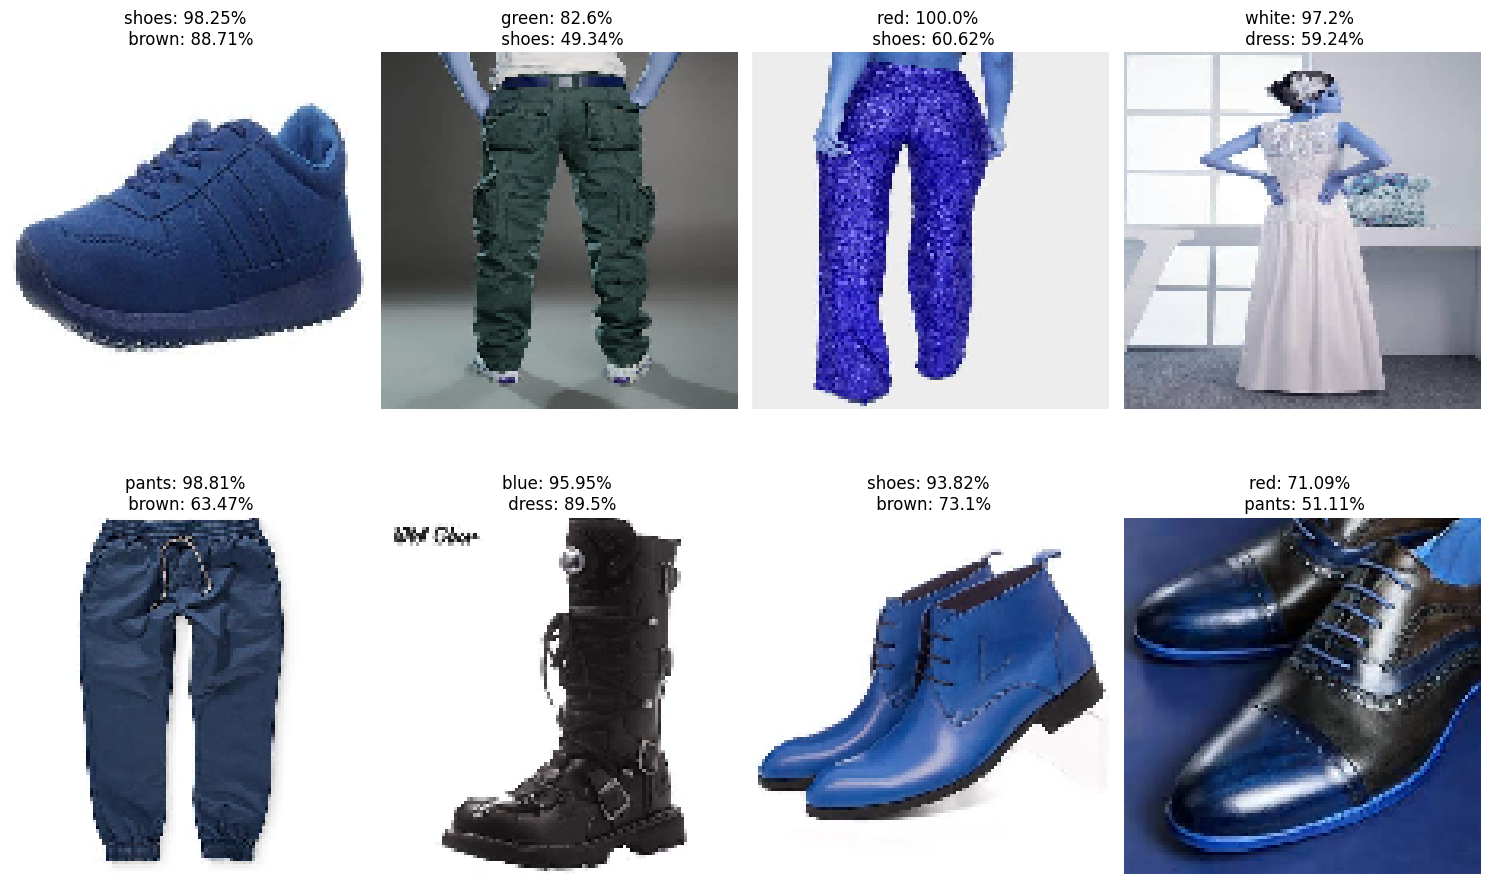

In [50]:
import matplotlib.pyplot as plt
import cv2

# 8개의 이미지를 가져오기 위해 next() 메서드를 사용합니다.
images, labels = next(test_generator)

# 모델을 사용하여 예측 수행
preds = model.predict(images)

plt.figure(figsize=(15, 10))

# 8개의 이미지에 대한 예측을 시각화합니다.
for i in range(8):
    plt.subplot(2, 4, i + 1)

    # 예측 확률을 추출합니다.
    prob = list(zip(list(test_df.columns[2:]), list(preds[i])))
    prob = sorted(prob, key=lambda x: x[1], reverse=True)[:2]

    # 이미지를 읽고 RGB로 변환합니다.
    image = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)

    # 이미지와 예측 정보를 출력합니다.
    plt.imshow(image)
    plt.title(f'{prob[0][0]}: {round(prob[0][1] * 100, 2)}% \n {prob[1][0]}: {round(prob[1][1] * 100, 2)}%')
    plt.axis('off')

plt.tight_layout()
plt.show()